# Overview
In this lab you’ll load time series data from a CSV file, manipulate the data using various Pandas functions, and plot the data using various MatPlotLib plotting functions.

# Roadmap
There are 7 exercises in this lab, of which the last exercise is "if time permits". Here is a brief summary of the tasks you will perform in each exercise; more detailed instructions follow later:
1.	Loading raw time series data
2.	Loading time series data and indexing by date
3.	Filling in holes in time series data
4.	Resampling time series data
5.	Indexing into time series data
6.	Plotting time series data
7.	(If time permits) Additional plotting techniques
 
# Familiarization
In the Data folder, open CO2.csv in a text editor. This file contains real measurements of atmospheric CO2 concentrations taken at Mauna Loa Observatory in Hawaii 
between 1958 and 2001. 

This is how the data in the CSV file was collated:
-	Physicists recorded CO2 concentrations four times per hour. Steady data periods of at least 6 hours per day were required; if there was no such 6-hour period on any given day, then no data was recorded for that day. 
-	Weekly averages were calculated for most weeks during the period from 1958 to 2001. There were some weeks where no averages would be calculated because no data had been collected.

Now take a closer look at the data in the CSV file. Each line in the file has two columns:
-	The date column contains weekly dates.
-	The co2 column contains the average CO2 value for that week. Some weeks don’t have a value. We’ll need to think about how to handle these weeks when we start working with the data shortly… 
 


# Global Settings

In [4]:
import pandas as pd

input_file = './Data/CO2.csv'

# Exercise 1:  Loading raw time series data

Add code to load the data from CO2.csv into a Pandas DataFrame, and print the following info about the DataFrame:
-	The first 26 weeks of data (i.e. 6 months) – use the head() function here.
-	The data types of the columns in the DataFrame – use the dtypes property here. 
-	The index values in the DataFrame – use the index property here. 



In [5]:
# Load data.
data = pd.read_csv(input_file)

# Print info about the data.
print('\nRaw data\n', data.head(26))
print('\nData types\n', data.dtypes)
print('\nData index\n', data.index)


Raw data
           date    co2
0   1958-03-29  316.1
1   1958-04-05  317.3
2   1958-04-12  317.6
3   1958-04-19  317.5
4   1958-04-26  316.4
5   1958-05-03  316.9
6   1958-05-10    NaN
7   1958-05-17  317.5
8   1958-05-24  317.9
9   1958-05-31    NaN
10  1958-06-07    NaN
11  1958-06-14    NaN
12  1958-06-21    NaN
13  1958-06-28    NaN
14  1958-07-05  315.8
15  1958-07-12  315.8
16  1958-07-19  315.4
17  1958-07-26  315.5
18  1958-08-02  315.6
19  1958-08-09  315.1
20  1958-08-16  315.0
21  1958-08-23    NaN
22  1958-08-30  314.1
23  1958-09-06  313.5
24  1958-09-13    NaN
25  1958-09-20    NaN

Data types
 date     object
co2     float64
dtype: object

Data index
 RangeIndex(start=0, stop=2284, step=1)


# Exercise 2:  Loading time series data and indexing by date

In the previous exercise you loaded the CSV data into a simple Pandas DataFrame. The DataFrame was indexed by number (e.g. 0, 1, 2, etc.). 

When working with time series data in Python, it’s important that the DataFrame is indexed by date/time rather than by number. Therefore, tweak your call to the read_csv() function so that it specifies the date column as the index column for the DataFrame. 

Also extract the co2 column of the DataFrame object into a Pandas Series object (it’s easier to manipulate time series data in a Series than to grab a column from a DataFrame).

Print the following information about the Series object:
-	The first 26 weeks of data.
-	The data types of the columns in the Series. 
-	The index values the Series.

This should confirm that the Series is now indexed by date/time rather than by number:



In [6]:
# Load data.
data = pd.read_csv(input_file, 
                   parse_dates=['date'], 
				   index_col='date')

# Get the co2 column as a Pandas Series object.
ts = data['co2']

# Print info about the data.
print('\nParsed data\n', ts.head(26))
print('\nData types\n', ts.dtypes)
print('\nData index\n', ts.index)


Parsed data
 date
1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
1958-05-03    316.9
1958-05-10      NaN
1958-05-17    317.5
1958-05-24    317.9
1958-05-31      NaN
1958-06-07      NaN
1958-06-14      NaN
1958-06-21      NaN
1958-06-28      NaN
1958-07-05    315.8
1958-07-12    315.8
1958-07-19    315.4
1958-07-26    315.5
1958-08-02    315.6
1958-08-09    315.1
1958-08-16    315.0
1958-08-23      NaN
1958-08-30    314.1
1958-09-06    313.5
1958-09-13      NaN
1958-09-20      NaN
Name: co2, dtype: float64

Data types
 float64

Data index
 DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
           

# Exercise 3:  Filling in holes in time series data


As you’ve seen, some of the weekly recordings of CO2 data are empty – these show up as NaN when you print the data.

Dealing with missing data can be an important consideration when processing time series data, and Pandas provides a handy function named fillna() that fills in holes in a DataFrame or Series object. See here for full documentation:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html

Let’s see how the fillna() function works. Open a new Python shell (i.e. type python at the command line) and type the following statements to import the Pandas and Numpy modules and to create a Pandas Series object that contains some holes:

`import pandas as pd`

`import numpy as np`

`data = pd.Series([100, np.nan, 200, np.nan, np.nan, 300])`

Now call the fillna() function with various parameters as follows, to fill-in the holes in various ways (note that by default, fillna() doesn’t modify the data in-place; rather, it leaves the original data unchanged and returns new data with the holes filled in):

`data.fillna(-1)              # Fill with a value, e.g. -1.`

`data.fillna(method='bfill')  # Fill backwards from next value.`

`data.fillna(method='ffill')  # Fill forwards from previous value.`



Now that you know how fillna() works, tweak your code in processCO2data.py so that it fills in the holes in the CO2 time series data. We suggest you use either the 'bfill' or 'ffill' method (in the solution code, we’ve plumped for the 'bfill' method). 

Remember to reassigned the updated data back to your original variable. For example, if your data variable is named ts, then you need code such as the follows:

`ts = ts.fillna(method='bfill')`

Print the time series data after you’ve filled in the holes, to verify that all the entries in the time series data now contain actual values (i.e. no NaN values anywhere).
 


In [7]:
# Fill in each hole with the next available value.
ts = ts.fillna(method='bfill')
print('\nParsed data, filled-in holes\n', ts.head(26))



Parsed data, filled-in holes
 date
1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
1958-05-03    316.9
1958-05-10    317.5
1958-05-17    317.5
1958-05-24    317.9
1958-05-31    315.8
1958-06-07    315.8
1958-06-14    315.8
1958-06-21    315.8
1958-06-28    315.8
1958-07-05    315.8
1958-07-12    315.8
1958-07-19    315.4
1958-07-26    315.5
1958-08-02    315.6
1958-08-09    315.1
1958-08-16    315.0
1958-08-23    314.1
1958-08-30    314.1
1958-09-06    313.5
1958-09-13    313.0
1958-09-20    313.0
Name: co2, dtype: float64


# Exercise 4:  Resampling time series data

When you’re working with real-world time series data, one of the challenges you might encounter is that you have too much data. For example, imagine an avionics sensor that captures data every millisecond – one day’s worth of data will include 86,400,000 data points! 

It’s highly likely you don’t need that much data for your statistical calculations. Indeed, having to deal with such vast datasets can be untenable unless you throw 
some serious hardware at the problem, or use a product such as Apache Spark and Hadoop for Big Data computing.

In many cases, the best approach is to “resample” the data to reduce the number of data points. This is such a common technique that Pandas provides a function named resample() that resamples data in a DataFrame or Series object. 

See here for full documentation:
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

resample() performs a “group by” operation. You can pass a string parameter that indicates how to group values (e.g. 'MS' means group by the start of a calendar month). 

For a list of all the possibilities, see here:
    https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

resample() returns a “resampler” object that represents the resampled data, e.g. the data grouped by the start of calendar months. You can then call various functions to calculate things like the maximum/minimum value in each group, the mean value in each group, the variance or standard deviation in each group, and so on. 

For a full list of functions available, see here:
    https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html

Putting all this together, add the following statement in processCO2data.py. The statement resamples the data into calendar-months groups and calculates the mean value for each month. 

`ts = ts.resample('MS').mean()`

Print ts after this operation, to confirm that you now have monthly data (rather than weekly data as before).


In [8]:
# Resample the data - combine all the readings for a month into a single (mean) value.
ts = ts.resample('MS').mean()
print('\nResampled data, single (mean) value per month\n', ts.head(12))



Resampled data, single (mean) value per month
 date
1958-03-01    316.100
1958-04-01    317.200
1958-05-01    317.120
1958-06-01    315.800
1958-07-01    315.625
1958-08-01    314.780
1958-09-01    313.125
1958-10-01    313.000
1958-11-01    313.340
1958-12-01    314.700
1959-01-01    315.500
1959-02-01    316.750
Freq: MS, Name: co2, dtype: float64


# Exercise 5:  Indexing into time series data

As we discussed during the chapter, when you work with time series data in Python/Pandas, the DataFrame or Series object must be indexed by date/time. This means you can index into the data to obtain the value for a particular date/time, or get a range of values for a specified date/time range.
With this in mind, add code in processCO2data.py to obtain the CO2 readings for the following dates or date ranges:
-	CO2 reading for July 1958
-	CO2 readings for July-December 1958
-	CO2 readings for all months up to December 1958
-	CO2 readings for all months from July 1997 onwards
-	CO2 readings for all months in 1997

You can also get statistical summary information for values in a date/time range, via the describe() function. For example, get statistical information for all CO2 readings in 1997. 


In [10]:
# Index into data in various ways.
print('\nCO2 reading for July 1958\n', ts['1958-07'])
print('\nCO2 readings for July-December 1958\n', ts['1958-07' : '1958-12'])
print('\nCO2 readings for all months up to December 1958\n', ts[ : '1958-12'])
print('\nCO2 readings for all months from July 1997 onwards\n', ts['1997-07' :])
print('\nCO2 readings for all months in 1997\n', ts['1997'])

# Get some info about these values, e.g. for CO2 in 1997.
print('\nCO2 1997 info\n', ts['1997'].describe())



CO2 reading for July 1958
 date
1958-07-01    315.625
Freq: MS, Name: co2, dtype: float64

CO2 readings for July-December 1958
 date
1958-07-01    315.625
1958-08-01    314.780
1958-09-01    313.125
1958-10-01    313.000
1958-11-01    313.340
1958-12-01    314.700
Freq: MS, Name: co2, dtype: float64

CO2 readings for all months up to December 1958
 date
1958-03-01    316.100
1958-04-01    317.200
1958-05-01    317.120
1958-06-01    315.800
1958-07-01    315.625
1958-08-01    314.780
1958-09-01    313.125
1958-10-01    313.000
1958-11-01    313.340
1958-12-01    314.700
Freq: MS, Name: co2, dtype: float64

CO2 readings for all months from July 1997 onwards
 date
1997-07-01    364.375
1997-08-01    362.460
1997-09-01    360.150
1997-10-01    360.750
1997-11-01    362.380
1997-12-01    364.250
1998-01-01    365.340
1998-02-01    366.200
1998-03-01    367.375
1998-04-01    368.525
1998-05-01    369.140
1998-06-01    368.750
1998-07-01    367.600
1998-08-01    365.720
1998-09-01    363.925

# Exercise 6:  Plotting time series data

Visualization is a valuable tool when you’re trying to understand time series data. You can use MatPlotLib to plot various types of graphs that show how the data varies over time. To get started, add the following code to plot all the time series data:

`import matplotlib.pyplot as plt`

`%matplotlib inline`

`plt.plot(ts)`

`plt.show()`


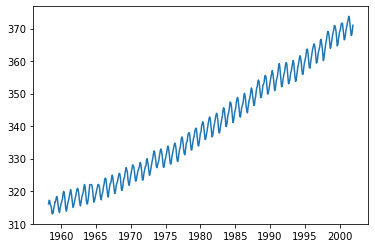

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

# Plot the entire TS.
plt.plot(ts)
plt.show()



# Exercise 7 (If time permits):  Additional plotting techniques
Another common requirement is to compare data for different seasons, side-by-side, to help you understand common patterns. 

e.g.
The first step is to get a slice of the time series data, for the period 1990 – 2000:

`tsSlice = ts['1990' : '2000']`

Next, group the values into annual chunks (the idea is to create a DataFrame with a separate column for each year’s worth of data). Here’s the code you need, followed by an explanation:

`groups = tsSlice.groupby(pd.Grouper(level='date', freq='Y'))`

`annualizedData = pd.DataFrame()`

`for dateIndex, group in groups:`

    `annualizedData[dateIndex.year] = group.values`
    
`print('\nAnnualized data\n', annualizedData)`

The first statement uses the groupby() function to group data into annual groups. The groupby() function takes a Pandas Grouper object as a parameter, which specifies that we want to group entries by the date index column, with 12 entries in each group (i.e. 12 months in each group). 

The groupby() function returns a “groupby” object that contains a collection of groups. We iterate through the collection of groups and copy each group of values into a separate column in the DataFrame. The columns are named by year.

The final step is to plot the DataFrame as a bunch of subplots: 
annualizedData.plot(subplots=True, legend=True)

`plt.show()`


There are other types of plots available. For example, the following code will print the DataFrame as a boxplot:

`annualizedData.boxplot() `

`plt.show()`



Annualized data
        1990     1991     1992     1993     1994     1995     1996     1997  \
0   353.650  354.675  355.900  356.680  358.320  359.975  362.025  363.125   
1   354.650  355.650  356.680  357.175  358.900  360.925  363.175  363.875   
2   355.480  357.200  357.900  358.425  359.925  361.575  364.060  364.560   
3   356.175  358.600  359.075  359.325  361.220  363.360  364.700  366.325   
4   357.075  359.250  359.540  360.180  361.650  363.700  365.325  366.680   
5   356.080  358.180  359.125  359.500  360.900  363.250  364.880  365.475   
6   354.675  356.050  357.000  357.420  359.460  361.800  363.475  364.375   
7   352.900  353.860  354.860  355.325  357.375  359.375  361.320  362.460   
8   350.940  352.125  353.025  353.775  355.925  358.000  359.400  360.150   
9   351.225  352.250  353.420  354.060  356.020  357.850  359.625  360.750   
10  352.700  353.740  354.200  355.350  357.575  359.475  360.740  362.380   
11  354.140  355.025  355.350  356.775  359.06

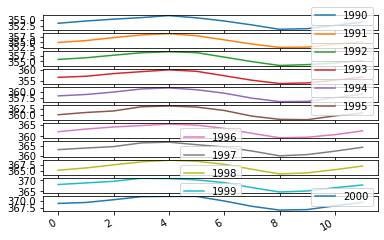

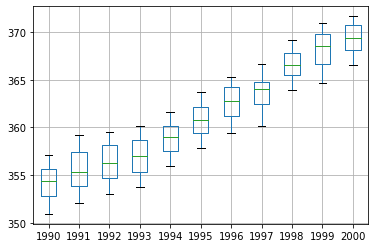

In [14]:
# Let's just look at the last 1990 - 2000, group data by year, and plot the years side-by-side for comparison.
tsSlice = ts['1990' : '2000']

groups = tsSlice.groupby(pd.Grouper(level='date', freq='Y'))
annualizedData = pd.DataFrame()
for dateIndex, group in groups:
    annualizedData[dateIndex.year] = group.values
print('\nAnnualized data\n', annualizedData)

# Plot as subplots.
annualizedData.plot(subplots=True, legend=True)
plt.show()

# Plot as boxplots with whiskers.
annualizedData.boxplot()
plt.show()